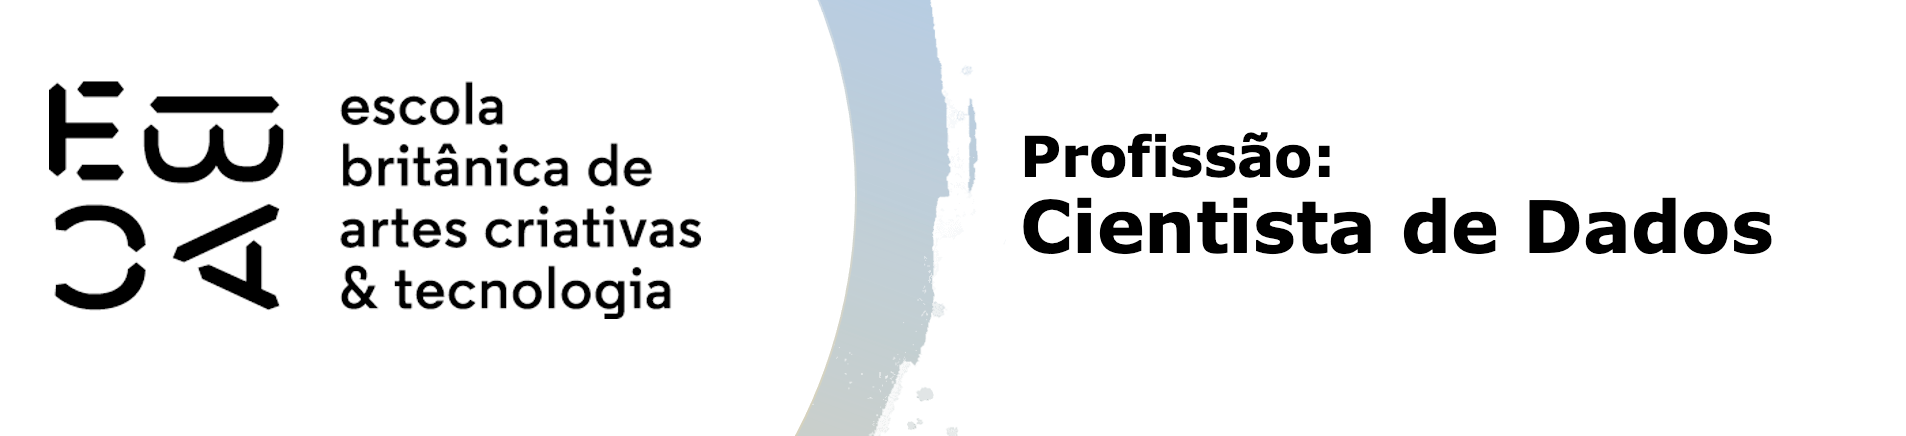

# Tarefa II

Ainda sobre a base da NFP vista na tarefa passada:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_pickle('base_nfp.pkl')

df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com o dia do mês, o dia da semana, fim de semana (sim ou não), ou até alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:

- Dia da semana
- Dummy para fim de semana
- Dia do mês
- Mês (já na base)
- Trimestre
- Ano (já na base)

**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

In [18]:
# Criando variáveis temporais

df['Data Emissão'] = pd.to_datetime(df['Data Emissão'])

df['dia_semana'] = df['Data Emissão'].dt.dayofweek       # 0=segunda, 6=domingo
df['fim_semana'] = (df['dia_semana'] >= 5).astype(int)   # 1=fim de semana, 0=outros dias
df['dia_mes'] = df['Data Emissão'].dt.day
df['mes'] = df['Data Emissão'].dt.month
df['trimestre'] = df['Data Emissão'].dt.quarter

df.head(20)

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria,dia_semana,fim_semana,dia_mes,mes,trimestre
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado,4,0,30,6,2
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto,4,0,30,6,2
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes,4,0,30,6,2
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes,4,0,30,6,2
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes,4,0,30,6,2
5,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,6699,2017-06-30,23.80,2017-06-30,0.38,Liberado,2017,1,0.015966,1,Restaurantes,4,0,30,6,2
6,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,6698,2017-06-30,56.00,2017-06-30,0.91,Liberado,2017,1,0.016250,1,Restaurantes,4,0,30,6,2
7,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,692,2017-06-30,49.00,2017-06-30,0.79,Liberado,2017,1,0.016122,1,Restaurantes,4,0,30,6,2
8,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,6697,2017-06-30,189.00,2017-06-30,3.08,Liberado,2017,1,0.016296,1,Restaurantes,4,0,30,6,2
9,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,6696,2017-06-30,25.00,2017-06-30,0.40,Liberado,2017,1,0.016000,1,Restaurantes,4,0,30,6,2


In [19]:
# Criar variáveis categóricas de quantis para Valor NF

df['valor_nf_q5'] = pd.qcut(df['Valor NF'], q=5, labels=False, duplicates='drop')
df['valor_nf_q10'] = pd.qcut(df['Valor NF'], q=10, labels=False, duplicates='drop')
df['valor_nf_q20'] = pd.qcut(df['Valor NF'], q=20, labels=False, duplicates='drop')
df['valor_nf_q50'] = pd.qcut(df['Valor NF'], q=50, labels=False, duplicates='drop')

df.head(20)

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,...,categoria,dia_semana,fim_semana,dia_mes,mes,trimestre,valor_nf_q5,valor_nf_q10,valor_nf_q20,valor_nf_q50
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,...,Mercado,4,0,30,6,2,1,3,7,17
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,...,Auto posto,4,0,30,6,2,2,5,11,28
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,...,Restaurantes,4,0,30,6,2,1,3,7,19
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,...,Restaurantes,4,0,30,6,2,3,7,15,38
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,...,Restaurantes,4,0,30,6,2,3,7,15,39
5,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,6699,2017-06-30,23.80,2017-06-30,0.38,Liberado,2017,1,...,Restaurantes,4,0,30,6,2,1,3,6,17
6,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,6698,2017-06-30,56.00,2017-06-30,0.91,Liberado,2017,1,...,Restaurantes,4,0,30,6,2,3,6,12,30
7,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,692,2017-06-30,49.00,2017-06-30,0.79,Liberado,2017,1,...,Restaurantes,4,0,30,6,2,2,5,11,28
8,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,6697,2017-06-30,189.00,2017-06-30,3.08,Liberado,2017,1,...,Restaurantes,4,0,30,6,2,4,8,17,43
9,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,6696,2017-06-30,25.00,2017-06-30,0.40,Liberado,2017,1,...,Restaurantes,4,0,30,6,2,1,3,7,17


## Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

In [20]:
# Função para calcular WOE e IV

def calcula_woe_iv(df, var, target):
    """
    df: DataFrame
    var: variável categórica para calcular WOE/IV
    target: variável binária (evento=1, não-evento=0)
    """
    # Tabela de frequência
    tab = pd.crosstab(df[var], df[target])
    tab.columns = ['Nao_Evento', 'Evento']
    tab['Total'] = tab['Nao_Evento'] + tab['Evento']

    # Proporções
    tab['Perc_Evento'] = tab['Evento'] / tab['Evento'].sum()
    tab['Perc_Nao_Evento'] = tab['Nao_Evento'] / tab['Nao_Evento'].sum()

    # WOE
    tab['WOE'] = np.log((tab['Perc_Evento'] + 1e-6) / (tab['Perc_Nao_Evento'] + 1e-6))

    # IV
    tab['IV'] = (tab['Perc_Evento'] - tab['Perc_Nao_Evento']) * tab['WOE']

    # Resultado
    iv_total = tab['IV'].sum()
    return tab[['WOE', 'IV']], iv_total

# Metadados com variáveis a testar
variaveis = ['categoria', 'valor_nf_q5', 'valor_nf_q10', 'valor_nf_q20', 'valor_nf_q50','fim_semana']

# Loop para calcular IV de todas as variáveis
resultados = []

for var in variaveis:
    _, iv_total = calcula_woe_iv(df, var, 'flag_credito')
    resultados.append({'Variavel': var, 'IV_total': iv_total})

# Tabela final de IVs
tabela_iv = pd.DataFrame(resultados).sort_values(by='IV_total', ascending=False)

print("Tabela de Information Value (IV):")
print(tabela_iv)


Tabela de Information Value (IV):
       Variavel  IV_total
0     categoria  0.408296
4  valor_nf_q50  0.152305
3  valor_nf_q20  0.124522
2  valor_nf_q10  0.106649
1   valor_nf_q5  0.056694
5    fim_semana  0.004346


## Conclua

- Quais variáveis parecem apresentar maior poder de discriminação segundo o IV?
- Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV?

<font color='red'>

Vamos classificar os valores de IV encontrados no exercício de acordo com a tabela abaixo:

|Faixa|Poder preditivo|
|:-|:-|
|0 a 0,02| Inútil |
|0,02 a 0,1| Fraco |
|0,1 a 0,3| Médio |
|0,3 a 0,5| Forte |
|0,5 ou mais| Suspeito de tão alto |

*1 ->* A variável que teve maior valor de IV foi a `categoria`, classificada como *forte*. Essa é a variável que mais agrega informação ao modelo, confirmando a intuição de que o tipo de estabelecimento influencia bastante no retorno. Sobre os quantis de valor da NF, todas apresentam poder de predição fraco a médio, enquanto a flag do fim de semana se mostrou inútil, ou seja, não faz diferença no modelo.

*2 ->* Foi possível observar que, quanto maior o número de quantis, maior tende a ser o IV. Mais categorias significa mais poder discriminatório, mas também mais risco de overfitting. No exemplo, `valor_nf_q50` trouxe ganho, mas o salto é menor em (q20 -> q50) em comparação com (q5 -> q10).


</font>

## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

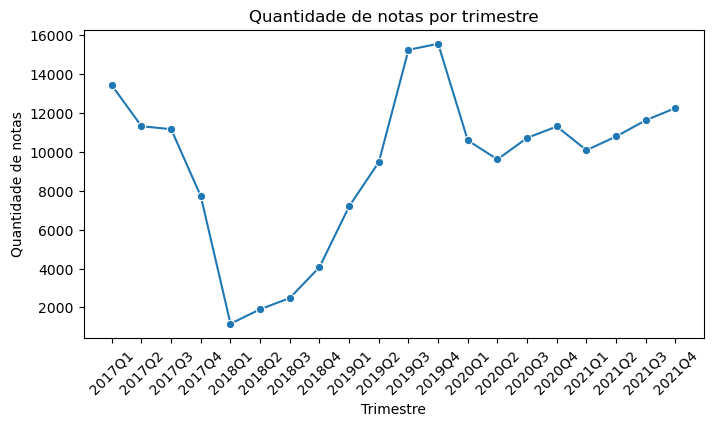

In [22]:
# Quantidade de notas registradas por trimestre
df['trimestre'] = df['Data Emissão'].dt.to_period('Q').astype(str)

notas_trimestre = df.groupby('trimestre').size().reset_index(name='qtd_notas')

plt.figure(figsize=(8,4))
sns.lineplot(data=notas_trimestre, x='trimestre', y='qtd_notas', marker='o')
plt.title("Quantidade de notas por trimestre")
plt.xlabel("Trimestre")
plt.ylabel("Quantidade de notas")
plt.xticks(rotation=45)
plt.show()

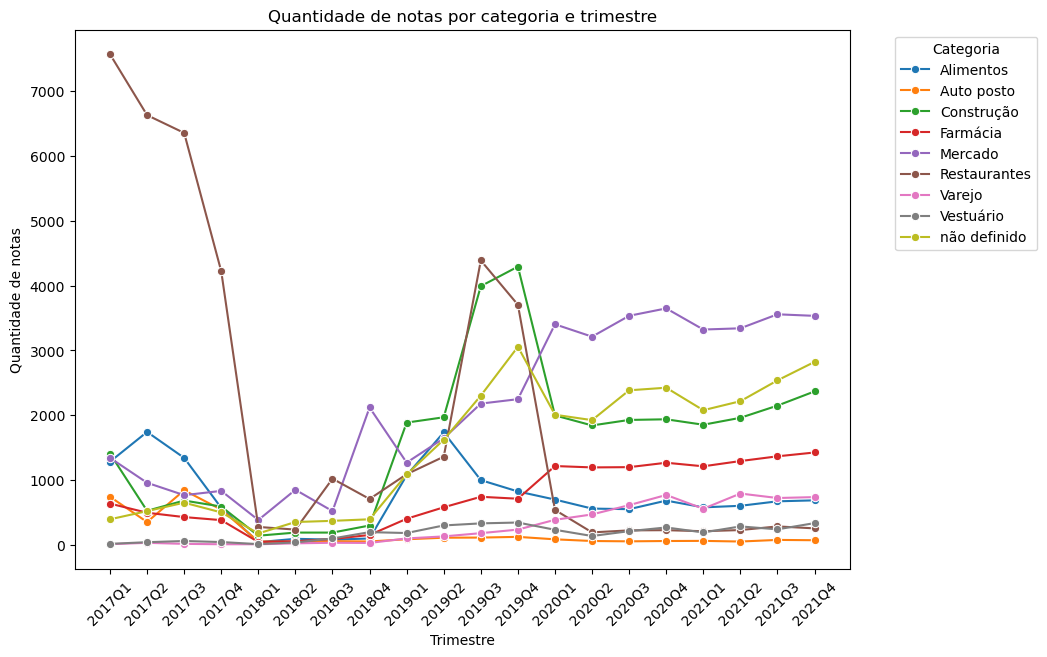

In [35]:
# Quantidade de notas por categoria e por trimestre
notas_cat_trim = df.groupby(['trimestre','categoria']).size().reset_index(name='qtd_notas')

plt.figure(figsize=(10,7))
sns.lineplot(data=notas_cat_trim, x='trimestre', y='qtd_notas', hue='categoria', marker='o')
plt.title("Quantidade de notas por categoria e trimestre")
plt.xlabel("Trimestre")
plt.ylabel("Quantidade de notas")
plt.xticks(rotation=45)
plt.legend(title="Categoria", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

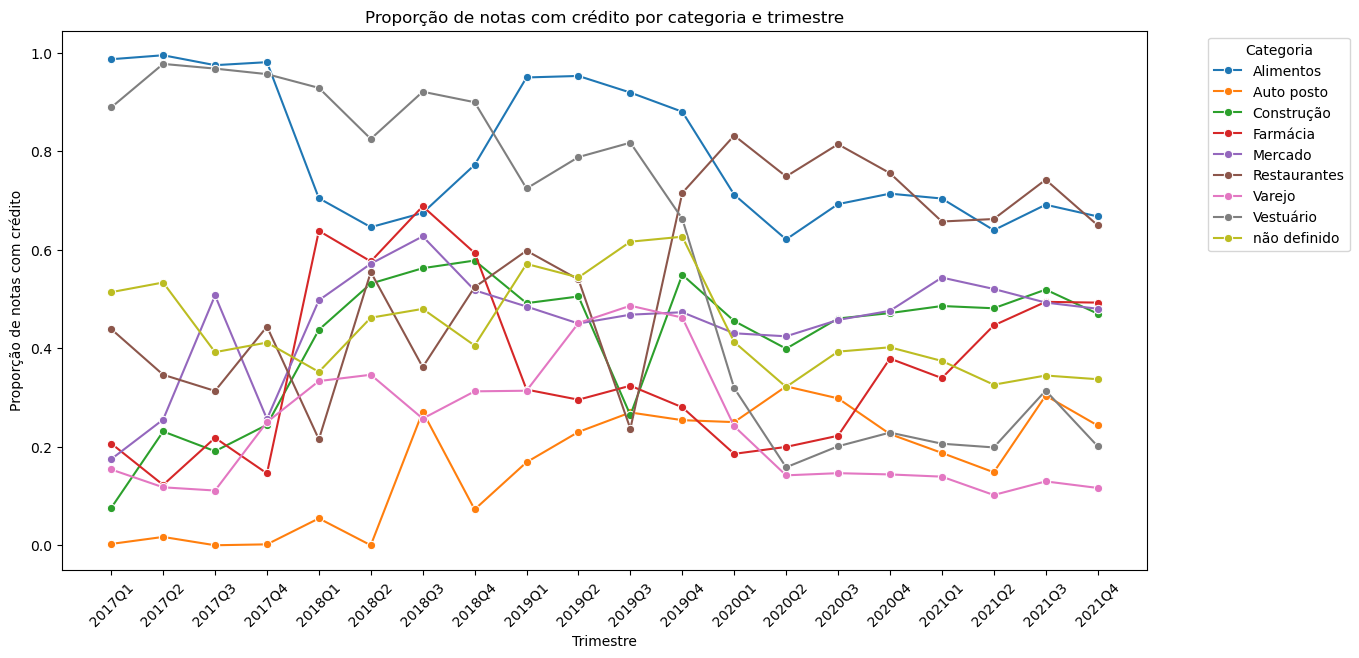

In [ ]:
# Proporção de notas com crédito por categoria e por trimestre
prop_cat_trim = df.groupby(['trimestre','categoria'])['flag_credito'].mean().reset_index()

plt.figure(figsize=(14,7))
sns.lineplot(data=prop_cat_trim, x='trimestre', y='flag_credito', hue='categoria', marker='o')
plt.title("Proporção de notas com crédito por categoria e trimestre")
plt.xlabel("Trimestre")
plt.ylabel("Proporção de notas com crédito")
plt.xticks(rotation=45)
plt.legend(title="Categoria", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

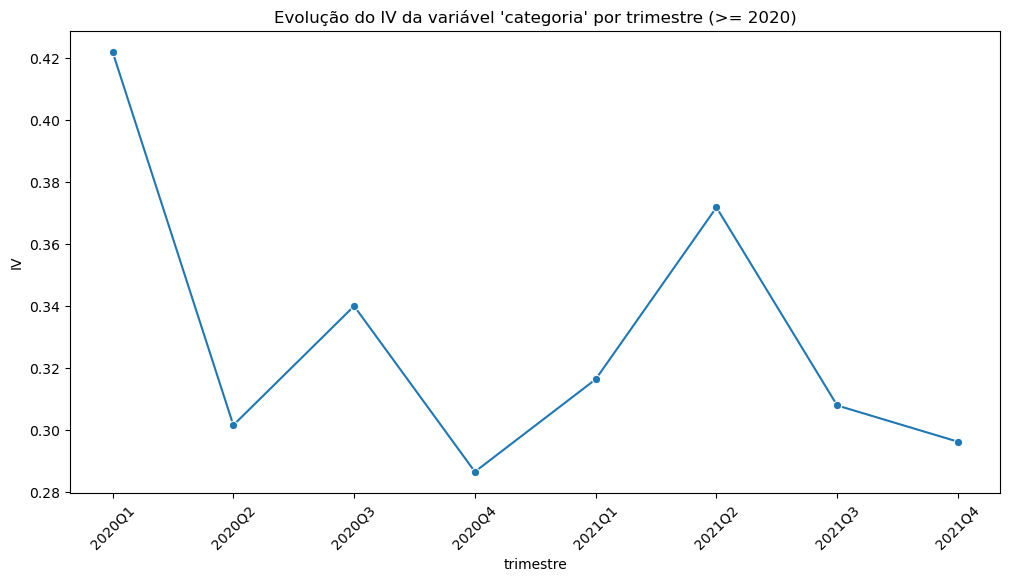

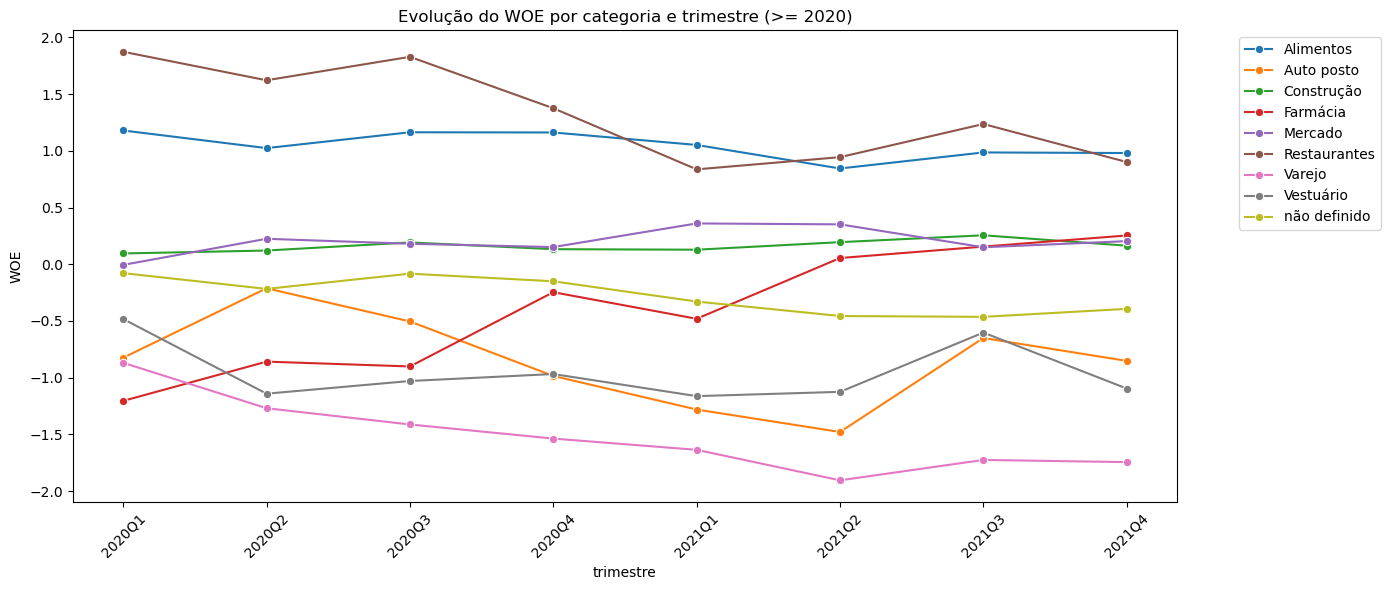

In [37]:
# 1) Agrupar por trimestre e categoria
agrupado = df.groupby(['trimestre','categoria']).agg(
    good=('flag_credito','sum'),
    total=('flag_credito','count')
).reset_index()

# 2) Calcular bads
agrupado['bad'] = agrupado['total'] - agrupado['good']

# 3) Totais por trimestre
totais = agrupado.groupby('trimestre')[['good','bad']].sum().reset_index()
totais = totais.rename(columns={'good':'total_good','bad':'total_bad'})

# 4) Juntar totais
agrupado = agrupado.merge(totais,on='trimestre')

# 5) Calcular WOE e IV
agrupado['dist_good'] = agrupado['good'] / agrupado['total_good']
agrupado['dist_bad'] = agrupado['bad'] / agrupado['total_bad']
agrupado['WOE'] = np.log((agrupado['dist_good'] + 1e-6) / (agrupado['dist_bad'] + 1e-6))
agrupado['IV'] = (agrupado['dist_good'] - agrupado['dist_bad']) * agrupado['WOE']

# 6) IV total da variável por trimestre
iv_trimestre = agrupado.groupby('trimestre')['IV'].sum().reset_index()

# --- Visualizações ---

# Filtrar apenas de 2020 em diante
agrupado_2020 = agrupado[agrupado['trimestre'] >= "2020Q1"].copy()
iv_trimestre_2020 = iv_trimestre[iv_trimestre['trimestre'] >= "2020Q1"].copy()

# Evolução do IV da variável no tempo (a partir de 2020)
plt.figure(figsize=(12,6))
sns.lineplot(data=iv_trimestre_2020, x='trimestre', y='IV', marker='o')
plt.xticks(rotation=45)
plt.title("Evolução do IV da variável 'categoria' por trimestre (>= 2020)")
plt.show()

# Evolução do WOE das categorias (a partir de 2020)
plt.figure(figsize=(14,6))
sns.lineplot(data=agrupado_2020, x='trimestre', y='WOE', hue='categoria', marker='o')
plt.xticks(rotation=45)
plt.title("Evolução do WOE por categoria e trimestre (>= 2020)")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


## Conclua

- Quais categorias parece ter maior proporção de notas com retornos maiores que zero?
- Essas diferenças são estáveis no tempo?

Dicas:<br>
- Considere que a quantidade de notas vem aumentando
- Considere que há períodos bem atípicos no histórico
- Considere que a partir de janeiro de 2020 o público é mais parecido com o público atual (2022), seja por pandemia, seja por crescimento do público, e considere os dados dessa data em diante na sua conclusão.

<font color='red'>

### Conclusão
As análises indicam que as categorias *Restaurantes* e *Alimentos* consistentemente apresentam as maiores proporções de notas com retorno positivo (>0). Isso se reflete nos valores de WOE persistentemente altos dessas categorias, sinalizando que, em média, elas discriminam melhor os eventos de crédito positivo em relação às demais. Já categorias como *Varejo*, *Vestuário* e *Auto posto* tendem a apresentar proporções negativas ou muito baixas, com WOE negativo, evidenciando menor probabilidade de gerar crédito.

Ao avaliar a evolução no tempo, observa-se que essas diferenças são relativamente estáveis, embora existam oscilações associadas a períodos atípicos, como o impacto da pandemia nos 2 primeiros trimestres de 2020. Ainda assim, a hierarquia entre categorias se mantém: *Restaurantes* e *Alimentos* no topo, e *Varejo*, *Vestuário* e *Auto posto* na base. A estabilidade dessa diferenciação, mesmo diante do crescimento no número de notas, reforça a robustez da variável categoria como discriminadora relevante para modelos preditivos.

</font>